In [25]:
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from nltk.probability import FreqDist
import nltk

In [26]:
df = pd.read_csv("kompas_20211201_clean.csv")
del df['Unnamed: 0']
df

,date,title
0,2021-12-01,chelsea vs liverpool gelar juara tim muda the ...
1,2021-12-01,warga mamasa antre minyak goreng mengular jala...
2,2021-12-01,menurun tersisa pasien covid jalani isolasi gr...
3,2021-12-01,libur isra miraj kendaraan tinggalkan jabodeta...
4,2021-12-01,maret pemerintah pangkas karantina turis asing
5,2021-12-01,mengenal trofi alan hardaker penghargaan pemai...
6,2021-12-01,mengenal swift sistem keuangan global dipelint...
7,2021-12-01,makan malam sehat jam makan kesehatan
8,2021-12-01,gejala omicron siluman orang rentan terinfeksi
9,2021-12-01,menghilangkan bau jamur pakaian


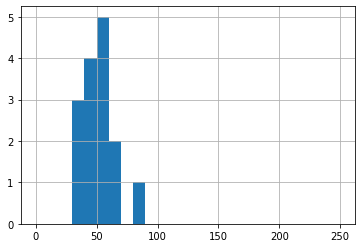

In [27]:
#Distribusi Frekuensi Jumlah Karakter per Data
bin_range = np.arange(0, 260, 10)
df['title'].str.len().hist(bins=bin_range)
plt.show()

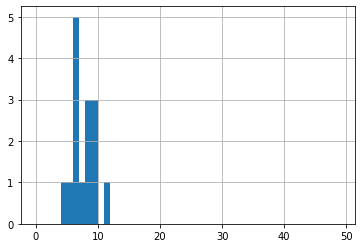

In [28]:
#Distribusi Frekuensi Jumlah Kata per Data
bin_range = np.arange(0, 50)
df['title'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

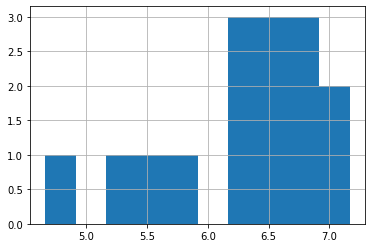

In [29]:
#Distribusi Frekuensi Panjang Kata Rata-Rata Pada Data
df['title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

<FreqDist with 108 samples and 339 outcomes>
[("'", 108), (',', 93), ('[', 15), (']', 15), ("'jalan", 2), ("'mengenal", 2), ("'pemain", 2), ("'makan", 2), ("'chelsea", 1), ("'vs", 1), ("'liverpool", 1), ("'gelar", 1), ("'juara", 1), ("'tim", 1), ("'muda", 1), ("'the", 1), ("'reds", 1), ("'warga", 1), ("'mamasa", 1), ("'antre", 1)]


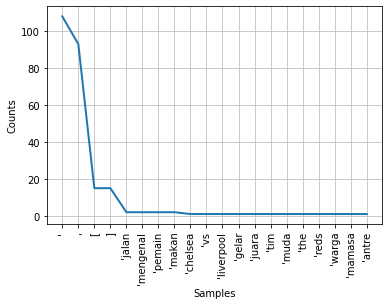

In [36]:
#Distribusi Frekuensi Kata
df['title'] = df['title'].apply(lambda x: word_tokenize(str(x)))
title = [word for title in df['title'] for word in title]
fqdist = FreqDist(title)
print(fqdist)

most_common_word = fqdist.most_common(20)

print(most_common_word)

fqdist.plot(20,cumulative=False)

plt.show()



In [35]:
result = pd.Series(nltk.ngrams(title, 10)).value_counts()[:20]
print (result)

(chelsea, vs, liverpool, gelar, juara, tim, muda, the, reds, warga)                            1
(jamur, pakaian, seblak, bandung, makanan, populer, jawa, rahasianya, arahan, presiden)        1
(menghilangkan, bau, jamur, pakaian, seblak, bandung, makanan, populer, jawa, rahasianya)      1
(terinfeksi, menghilangkan, bau, jamur, pakaian, seblak, bandung, makanan, populer, jawa)      1
(rentan, terinfeksi, menghilangkan, bau, jamur, pakaian, seblak, bandung, makanan, populer)    1
(orang, rentan, terinfeksi, menghilangkan, bau, jamur, pakaian, seblak, bandung, makanan)      1
(siluman, orang, rentan, terinfeksi, menghilangkan, bau, jamur, pakaian, seblak, bandung)      1
(omicron, siluman, orang, rentan, terinfeksi, menghilangkan, bau, jamur, pakaian, seblak)      1
(gejala, omicron, siluman, orang, rentan, terinfeksi, menghilangkan, bau, jamur, pakaian)      1
(kesehatan, gejala, omicron, siluman, orang, rentan, terinfeksi, menghilangkan, bau, jamur)    1
(makan, kesehatan, gejala, omi